### **Simple Linear Regression**
In this regression task we will predict the percentage of marks that a student is expected to score based upon the number of hours they studied. This is a simple linear regression task as it involves just two variables.

In [1]:
# Importing the libraries that we will use
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
# Reading the Data
score=pd.read_csv("student_score.csv")
score.head(4)# first 4 elements

,Hours,Scores
0,2.5,21
1,5.1,47
2,3.2,27
3,8.5,75


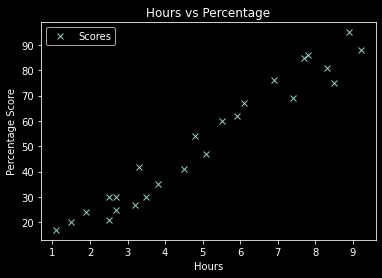

In [3]:
# Plotting the Hours and scores data to see their relationship with each other
with plt.style.context('dark_background'):
    score.plot(x='Hours', y='Scores',style='x')  
    plt.title('Hours vs Percentage')  
    plt.xlabel('Hours')  
    plt.ylabel('Percentage Score')  
    plt.show()

In [4]:
# preparing the data to be fitting 

# dividing data to feature and target
x=score.iloc[:,:1].values
y=score.iloc[:,1].values
# importing the algorithm that will split data into training set and test set
from sklearn.model_selection import train_test_split  
x_train, x_test, y_train, y_test = train_test_split(x, y, 
                            test_size=0.2, random_state=0) 

#impoting the LinearRegression algorithm
from sklearn.linear_model import LinearRegression  
random = LinearRegression() 
# Fitting the data into the algorithm by using the train set data
random.fit(x_train, y_train)

LinearRegression()

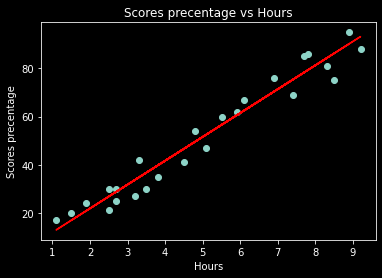

In [5]:
# getting the slope
line = random.coef_*x+random.intercept_
# ploting the data hours and scores
with plt.style.context('dark_background'):
    plt.scatter(x,y)
    plt.xlabel("Hours")
    plt.ylabel("Scores precentage")
    plt.title("Scores precentage vs Hours")
    plt.plot(x,line,'-r');

In [6]:
#testing the code to validation set
y_pred=random.predict(x_test)
# comparing the prediction with the real values
da=pd.DataFrame({"Real":y_test,"Predict":y_pred})
da

,Real,Predict
0,20,16.884145
1,27,33.732261
2,69,75.357018
3,30,26.794801
4,62,60.491033


In [7]:
#testing the code to test data that doesn't have an output
hours = [[9.25]]
own_pred = random.predict(hours)
print("No of Hours = {}".format(hours))
print("Predicted Score = {}".format(own_pred[0]))

No of Hours = [[9.25]]
Predicted Score = 93.69173248737538


In [8]:
from sklearn.metrics import mean_absolute_error
mean_absolute_error(y_test,y_pred)

4.183859899002975

In [9]:
from sklearn.metrics import mean_squared_error
mean_squared_error(y_test,y_pred)

21.5987693072174